In [55]:
import pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pywt


In [56]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [93]:
def predict(file_name):
    model=pickle.load(open('model.pkl','rb'))
    X = []
    img = cv2.imread(file_name)
    
    if img is not None:
        scaled_raw_image = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scaled_raw_image.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))

        X.append(combined_img)
        X = np.array(X).reshape(4096,).astype(float)

        class_dict = {0: 'Atif_Aslam',1: 'cropped',2:'Humayun_Saeed',3:'Iqra_Aziz', 4:'Mahira_Khan', 5:'Sajal_Aly'}
        answer = model.predict([X])
        print(answer)
        
        print("The picture is of ", class_dict[answer[0]])
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        print("Please look at the File Path again. There is an issue in loading the picture.")

Please enter the path of image ./Test_Images/Sajal_Aly_1.jpg
[5]
The picture is of  Sajal_Aly


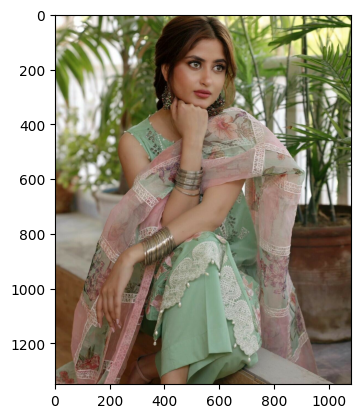

In [94]:
file_name = input("Please enter the path of image ")
predict(file_name)
# ./Test_Images/Sajal_Aly_1.jpg